<a href="https://colab.research.google.com/github/merlinkalokerinos/Studies-OAMK/blob/main/Machine_learning_Correlation_export_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os # u.a. zur Entwicklung plattformübergreifender Systempfade
import yaml # für Konfigurationen
import pandas as pd # Datenmanagement
import numpy as np # Hilfsfunktionen für mathematische Operationen

# Datenvisualisierung
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # Datensplits
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn import metrics # Modellevaluierung


In [ ]:
import pandas as pd 
df = pd.read_csv('test.csv')
df.head(10000)

,scraped location,purchasing price [in €],number of rooms,square metre,City district
0,"Helene-Mayer-Ring 4, Am Riesenfeld, München",970.00,1.0,28.00,11 Milbertshofen - Am Hart
1,"Helene-Mayer-Ring 4, Am Riesenfeld, München",980.00,1.0,30.00,11 Milbertshofen - Am Hart
2,"Schäftlarnstr. 135, Thalkirchen, München",990.00,1.0,35.00,19 Thalkirchen - Obersendling -Forstenried - F...
3,"Schäftlarnstr. 135, Thalkirchen, München",1000.00,1.0,33.00,19 Thalkirchen - Obersendling -Forstenried - F...
4,"Hohenlohestr. 37, Dom Pedro, München",1340.00,2.0,56.97,09 Neuhausen - Nymphenburg
...,...,...,...,...,...
6331,81379 München,2279.69,4.0,132.54,07 Sendling - Westpark
6332,81379 München,3114.54,5.0,141.57,07 Sendling - Westpark
6333,81379 München,1522.03,3.0,88.49,07 Sendling - Westpark
6334,81737 München,2390.00,2.0,65.00,16 Ramersdorf - Perlach


In [ ]:
groupby = df.groupby('City district')['number of rooms'].count()
groupby.head(25)


City district
01 Altstadt - Lehel                                                 172
02 Ludwigsvorstadt - Isarvorstadt                                   264
03 Maxvorstadt                                                      174
04 Schwabing - West                                                 304
05 Au - Haidhausen                                                  270
06 Sendling                                                         160
07 Sendling - Westpark                                              286
08 Schwanthalerhöhe                                                  72
09 Neuhausen - Nymphenburg                                          264
10 Moosach                                                          196
11 Milbertshofen - Am Hart                                          252
12 Schwabing - Freimann                                             290
13 Bogenhausen                                                      417
14 Berg am Laim                                   

In [ ]:
# wie viele Datenpunkte haben nicht-vollständige Attribute?
num_missing = len(df) - len(df.dropna())
ratio_missing = num_missing / len(df) 
# wir konvertieren in Prozente und runden auf 3 Nachkommastellen
ratio_missing = np.round(ratio_missing * 100, 3) 
print(f"{ratio_missing}% der Daten ({num_missing} Punkte) haben fehlende Werte!")

0.0% der Daten (0 Punkte) haben fehlende Werte!


In [ ]:
df.loc[df.isnull().sum(axis=1) == 1] # ein kleiner Trick zum anzeigen von Daten mit fehlenden Attributen

,scraped location,purchasing price [in €],number of rooms,square metre,City district


In [ ]:


df.isnull().sum(axis=0)



scraped location           0
purchasing price [in €]    0
number of rooms            0
square metre               0
City district              0
dtype: int64

In [ ]:
derived_df = df[['purchasing price [in €]']]
print(derived_df, "\n")

      purchasing price [in €]
0                      970.00
1                      980.00
2                      990.00
3                     1000.00
4                     1340.00
...                       ...
6331                  2279.69
6332                  3114.54
6333                  1522.03
6334                  2390.00
6335                   607.50

[6336 rows x 1 columns] 



In [ ]:


df = df.dropna() # löscht alle Zeilen mit fehlenden Attributen
df = df.reset_index(drop=True) # zählt unsere Daten neu durch



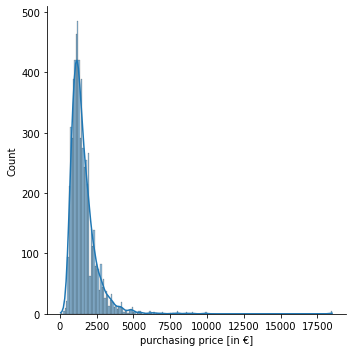

In [ ]:


sns.displot(data=df, x="purchasing price [in €]", kde=True);


In [ ]:


description = df.describe()
description



,purchasing price [in €],number of rooms,square metre
count,6336.000000,6336.000000,6336.000000
mean,1601.931252,2.232402,69.339372
std,975.459780,1.215432,40.469049
min,60.000000,1.000000,20.420000
25%,1040.000000,1.000000,41.000000
50%,1380.000000,2.000000,63.770000
75%,1900.000000,3.000000,86.000000
max,18500.000000,24.000000,700.000000


In [ ]:
avgkaufpreis = df["purchasing price [in €]"].mean()

In [ ]:


bins = [0] + list(description["purchasing price [in €]"][
    ["25%", "50%", "75%"]
].astype(int)) + [np.inf]
print(bins) # 0 bis 119.500 = 0 - 25% Quantil, 119.500 bis 179.700 = 25 - 50% Quantil, ...



[0, 1040, 1380, 1900, inf]


In [ ]:


df["house_cat"] = pd.cut(
    df["purchasing price [in €]"],
    bins=bins,
    labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"]
)



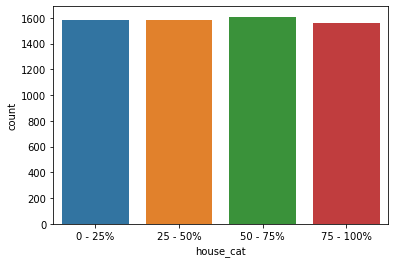

In [ ]:


sns.countplot(data=df, x="house_cat");



In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
for train_index, test_index in split.split(df, df["house_cat"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

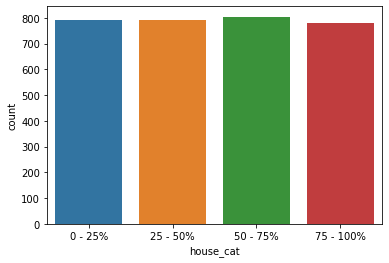

In [ ]:


sns.countplot(data=df_train, x="house_cat");



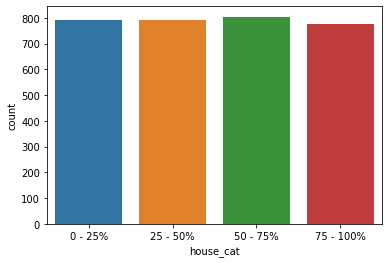

In [ ]:


sns.countplot(data=df_test, x="house_cat");



In [ ]:


df_train = df_train.drop("house_cat", axis=1)
df_test = df_test.drop("house_cat", axis=1)





# Correlation calculation

In [ ]:
df_train.corr()["purchasing price [in €]"].abs().sort_values(ascending=False)

purchasing price [in €]    1.000000
square metre               0.817406
number of rooms            0.667959
Name: purchasing price [in €], dtype: float64

In [ ]:
def engineer_features(df):
    df["ratio_rooms"] = df["square metre"] / df["number of rooms"]
    return df

In [ ]:


df_train = engineer_features(df_train)
df_test = engineer_features(df_test)



In [ ]:

df_train.corr()["purchasing price [in €]"].abs().sort_values(ascending=False)



purchasing price [in €]    1.000000
square metre               0.849145
number of rooms            0.719135
ratio_rooms                0.284673
Name: purchasing price [in €], dtype: float64

# ML-Coding

In [ ]:


!pip3 install scikit-learn==1.0.0



In [2]:
import os # u.a. zur Entwicklugn plattformübergreifender Systempfade
import pandas as pd # Datenmanagement
import numpy as np # Hilfsfunktionen für mathematische Operationen

# Datenvisualisierung
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # Datensplits
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn import metrics # Modellevaluierung

## eigene Funktionen
##def filter_df_by_proximity(df, proximity):
##    return df.loc[df["ocean_proximity"] == proximity]

##def engineer_features(df):
##    df["ratio_bedrooms"] = df["total_bedrooms"] / df["total_rooms"]
##    df["people_per_household"] = df["population"] / df["households"]
##    return df

##def get_features_and_targets(df):
##    X = df.drop(["median_house_value"], axis=1).values
##    y = np.stack(df["median_house_value"])
##    return X, y

In [ ]:
df12 = pd.read_csv('final test python.csv') # Wir lesen die Datei housing.csv ein

df2= df12.drop(['scraped location','City district','Indikatoren 2021.city district']  , 1)


df2.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: ignored

In [4]:
import os
import tarfile
import urllib.request

df12 = pd.read_csv('/content/drive/Othercomputers/My Laptop/Data Science/final test python.csv') # Wir lesen die Datei housing.csv ein

df2= df12.drop(['scraped location','City district','Indikatoren 2021.city district']  , 1)

#del df2['scraped location']
#del df2['City district']
#del df2['Indikatoren 2021.city district']



df2 = df2.dropna() # löscht alle Zeile mit fehlenden Attributen
df2 = df2.reset_index(drop=True) # zählt unsere Daten neu durch

def get_features_and_targets(df2):
    X = df2.drop(["purchasing price [in €]"], axis=1).values
    y = np.stack(df2["purchasing price [in €]"])
    return X, y

description = df2.describe()

bins = [0] + list(description["purchasing price [in €]"][
    ["25%", "50%", "75%"]
].astype(int)) + [np.inf]

df2["house_cat"] = pd.cut(
    df2["purchasing price [in €]"],
    bins=bins,
    labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"]
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in split.split(df2, df2["house_cat"]):
    df2_train = df2.loc[train_index]
    df2_test = df2.loc[test_index]
    
df2_train = df2_train.drop("house_cat", axis=1)
df2_test = df2_test.drop("house_cat", axis=1)

##df_train = df_train.drop(filter_df_by_proximity(df_train, "ISLAND").index)
##df_test = df_test.drop(filter_df_by_proximity(df_test, "ISLAND").index)

##df_train = engineer_features(df_train)
##df_test = engineer_features(df_test)



df2_train_ml = pd.get_dummies(df2_train) # One-Hot Encoding
df2_test_ml = pd.get_dummies(df2_test)



X_train, y_train = get_features_and_targets(df2_train_ml)
X_test, y_test = get_features_and_targets(df2_test_ml)




clf = LinearRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


LinearRegression()

In [5]:


predictions = clf.predict(X_test)



In [6]:
print("Prediction\t|True Value")
print("-"*30)
for idx, (pred, annotation) in enumerate(zip(predictions, y_test)):
    if idx == 594:
        break
    pred = int(pred)
    annotation = int(annotation)
    print(f"{pred}\t\t|{annotation}")

Prediction	|True Value
------------------------------
1474		|1150
1081		|900
580		|2850
3108		|2600
1733		|1870
666		|550
2469		|2190
933		|990
3073		|3350
1133		|1070
2413		|1838
1209		|1033
886		|1100
1550		|1450
1945		|1500
629		|712
1977		|2120
1036		|2963
1230		|970
797		|880
1700		|1600
803		|750
744		|971
812		|975
1579		|1250
1320		|1200
571		|800
1821		|1398
487		|639
2072		|1348
1084		|900
825		|1260
1476		|1535
1570		|1645
898		|1000
2061		|1750
720		|550
1722		|1244
495		|60
1193		|1219
1199		|850
683		|980
828		|1349
963		|1080
2369		|1430
925		|1100
993		|1225
1967		|1900
2126		|2100
1677		|1435
2300		|2750
1896		|1435
1366		|1325
2755		|2750
1424		|1035
1614		|1300
3669		|3300
1943		|1300
1124		|1180
1262		|1300
1846		|1426
1958		|1650
1628		|1460
1413		|1192
1154		|1300
1533		|1290
1230		|970
764		|1196
1234		|1440
537		|350
1516		|1040
788		|1938
2922		|2410
4709		|3600
882		|1000
1152		|1200
2135		|1600
1610		|1490
2152		|2160
1959		|1490
1166		|1290
1350		|1850
1316	

In [7]:
mae = metrics.mean_absolute_error(y_test, predictions)
mae_ratio = metrics.mean_absolute_percentage_error(y_test, predictions)
r2_score = metrics.r2_score(y_test, predictions)

In [8]:


print(f"Wir können durchschnittlich mit einem Fehler von {np.round(mae)} rechnen;")
print(f"Das entspricht im Schnitt einer Fehlerquote von {np.round(mae_ratio * 100)}%;")
print(f"Der R^2 Werte liegt bei {np.round(r2_score * 100)}%")



Wir können durchschnittlich mit einem Fehler von 299.0 rechnen;
Das entspricht im Schnitt einer Fehlerquote von 22.0%;
Der R^2 Werte liegt bei 80.0%


In [9]:


df2_test.iloc[0]



purchasing price [in €]                                                              1150.000000
number of rooms                                                                         2.000000
square metre                                                                           60.000000
Indikatoren 2021.crime rate                                                             0.023078
Indikatoren 2021.Population  - total                                                40704.000000
                                                                                        ...     
Indikatoren 2021.Migration rates by nationality - Internal migration (not german        7.300000
Indikatoren 2021.Migration rates by nationality - Exterior migration (german)         -16.400000
Indikatoren 2021.Migration rates by nationality - Exterior migration (not german        5.300000
Indikatoren 2021.Migration rates by nationality - overall migration (german)          -19.500000
Indikatoren 2021.Migration rat

In [11]:


single_pred = clf.predict([X_test[0]])[0]
print(f"Die Prognose liegt bei {single_pred}.")
print(f"Der Realwert war {y_test[0]}.")



Die Prognose liegt bei 1474.0343118487003.
Der Realwert war 1150.0.


In [14]:

df2_test['predictions']=predictions
#print(df2_test)

df2_test.append([df2_train])
df2_test.head(6000)
#df12.head(6000)

,purchasing price [in €],number of rooms,square metre,Indikatoren 2021.crime rate,Indikatoren 2021.Population - total,Indikatoren 2021.Population - german with migration background,Indikatoren 2021.Population - women (15 to 44),Indikatoren 2021.Population - not german,Indikatoren 2021.Population - total (0 to 17),Indikatoren 2021.Population - not german (0 to 17),...,Indikatoren 2021.Migration rates - overall migration,Indikatoren 2021.Migration rates by nationality - medium population (german),Indikatoren 2021.Migration rates by nationality - medium population (not german),Indikatoren 2021.Migration rates by nationality - Internal migration (german),Indikatoren 2021.Migration rates by nationality - Internal migration (not german,Indikatoren 2021.Migration rates by nationality - Exterior migration (german),Indikatoren 2021.Migration rates by nationality - Exterior migration (not german,Indikatoren 2021.Migration rates by nationality - overall migration (german),Indikatoren 2021.Migration rates by nationality - overall migration (not german),predictions
3447,1150.0,2.0,60.00,0.023078,40704.0,15.2,9842.0,27.0,13.2,8.0,...,-10.8,29817.0,11039.0,-3.1,7.3,-16.4,5.3,-19.5,12.7,1474.034312
1225,900.0,1.0,40.00,0.028373,68255.0,15.8,17107.0,23.3,12.8,6.8,...,-11.2,52620.0,15835.0,-10.5,0.7,-10.9,21.8,-21.4,22.5,1081.073504
4267,2850.0,1.0,25.00,0.068581,118010.0,22.7,23095.0,34.8,17.2,11.9,...,-1.7,77158.0,40896.0,0.8,7.0,-15.5,15.9,-14.7,22.9,580.849710
2613,2600.0,3.0,130.00,0.083317,77701.0,17.5,17648.0,30.4,15.2,10.0,...,-21.0,54443.0,23981.0,-11.1,-51.1,-17.8,48.0,-28.9,-3.1,3108.200316
4007,1870.0,3.0,79.36,0.020623,52999.0,14.1,11266.0,24.2,13.9,8.9,...,-2.2,40167.0,12767.0,9.0,1.1,-16.9,15.0,-8.0,16.1,1733.154979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,1290.0,2.0,85.00,0.030570,53483.0,17.1,12465.0,31.2,14.2,8.4,...,-12.4,36929.0,16695.0,-2.2,-4.6,-17.0,7.1,-19.2,2.6,1848.949586
2252,915.0,2.0,40.00,0.030570,53483.0,17.1,12465.0,31.2,14.2,8.4,...,-12.4,36929.0,16695.0,-2.2,-4.6,-17.0,7.1,-19.2,2.6,884.007798
4821,1400.0,4.0,84.00,0.028373,60540.0,18.0,13646.0,29.6,15.0,9.8,...,-1.6,42619.0,17955.0,1.0,8.3,-13.6,16.4,-12.6,24.7,1875.373039
604,1050.0,3.0,70.00,0.035457,74884.0,19.9,14450.0,23.8,20.1,13.1,...,2.2,57034.0,17772.0,11.5,16.2,-15.0,3.9,-3.4,20.1,1285.682945


In [43]:
dffinal=pd.merge(df12, df2_test, left_index=True, right_index=True, how='left')

In [45]:
list(dffinal)
dffinal.drop(['purchasing price [in €]_y',
 'number of rooms_y',
 'square metre_y',
 'Indikatoren 2021.crime rate_y',
 'Indikatoren 2021.Population  - total_y',
 'Indikatoren 2021.Population  - german with migration background_y',
 'Indikatoren 2021.Population  - women (15 to 44)_y',
 'Indikatoren 2021.Population  - not german_y',
 'Indikatoren 2021.Population  - total (0 to 17)_y',
 'Indikatoren 2021.Population  - not german (0 to 17)_y',
 'Indikatoren 2021.Population  - total (18 to 64)_y',
 'Indikatoren 2021.Population  - not german (18 to 64)_y',
 'Indikatoren 2021.Population  - total (65 and older)_y',
 'Indikatoren 2021.Population ratios  - total (0 to 14)_y',
 'Indikatoren 2021.Population ratios  - total (15 to 64)_y',
 'Indikatoren 2021.Population ratios  - total (65 and older)_y',
 'Indikatoren 2021.Population ratios  - total (75 and older)_y',
 'Indikatoren 2021.Population ratios  - Youth quotient_y',
 'Indikatoren 2021.Population ratios  - Old-age quotient_y',
 'Indikatoren 2021.Population ratios  - Overageing ratio_y',
 'Indikatoren 2021.Population ratios  - High aged_y',
 'Indikatoren 2021.Population  - not german (65 and older)_y',
 'Indikatoren 2021.Population  - single_y',
 'Indikatoren 2021.Population  - married_y',
 'Indikatoren 2021.Population  - Divorced_y',
 'Indikatoren 2021.Population  - widowed_y',
 'Indikatoren 2021.Population  - Religion (Roman Catholic)_y',
 'Indikatoren 2021.Population  - Religion (evangelical)_y',
 'Indikatoren 2021.Population  - Religion (orthodox)_y',
 'Indikatoren 2021.Population  - Religion (jewish)_y',
 'Indikatoren 2021.Population  - Religion (others)_y',
 'Indikatoren 2021.Population  - Religion (none)_y',
 'Indikatoren 2021.Population density - (Inhab. per ha)_y',
 'Indikatoren 2021.Area in ha_y',
 'Indikatoren 2021.Birth and death rates - crude birth rate_y',
 'Indikatoren 2021.Birth and death rates - Born_y',
 'Indikatoren 2021.Birth and death rates - general birth rate_y',
 'Indikatoren 2021.Birth and death rates - death rate_y',
 'Indikatoren 2021.Intra and extraurban migration movements - Moved within the mun_y',
 'Indikatoren 2021.Intra and extraurban migration movements - Moved within the m.1_y',
 'Indikatoren 2021.Intra and extraurban migration movements - moved to inner city _y',
 'Indikatoren 2021.Intra and extraurban migration movements - moved to inner cit.1_y',
 'Indikatoren 2021.Intra and extraurban migration movements - moved in from out of_y',
 'Indikatoren 2021.Intra and extraurban migration movements - moved in from out .1_y',
 'Indikatoren 2021.Intra and extraurban migration movements - moved from inner cit_y',
 'Indikatoren 2021.Intra and extraurban migration movements - moved from inner c.1_y',
 'Indikatoren 2021.Intra and extraurban migration movements - moved away from out _y',
 'Indikatoren 2021.Intra and extraurban migration movements - moved away from ou.1_y',
 'Indikatoren 2021.Intra and extraurban migration movements - Net migration (total_y',
 'Indikatoren 2021.Intra and extraurban migration movements - Net migration (not g_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination city d_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination city.1_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination city.2_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination city.3_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination city.4_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination city.5_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination city.6_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination city.7_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination city.8_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination city.9_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.10_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.11_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.12_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.13_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.14_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.15_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.16_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.17_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.18_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.19_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.20_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.21_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.22_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.23_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.24_y',
 'Indikatoren 2021.Inner-city migration movements by origin and destination cit.25_y',
 'Indikatoren 2021.Non-German population - total_y',
 'Indikatoren 2021.Non-German population - croatian_y',
 'Indikatoren 2021.Non-German population - turkish_y',
 'Indikatoren 2021.Non-German population - italian_y',
 'Indikatoren 2021.Non-German population - greek_y',
 'Indikatoren 2021.Non-German population - bosnian-herzegov_y',
 'Indikatoren 2021.Non-German population - austrian_y',
 'Indikatoren 2021.Non-German population - romanian_y',
 'Indikatoren 2021.Non-German population - polish_y',
 'Indikatoren 2021.Non-German population - Serbian_y',
 'Indikatoren 2021.Non-German population - Bulgarian_y',
 'Indikatoren 2021.Private households by household size - household size in person_y',
 'Indikatoren 2021.Private households by household size - household size in pers.1_y',
 'Indikatoren 2021.Private households by household size - household size in pers.2_y',
 'Indikatoren 2021.Private households by household size - household size in pers.3_y',
 'Indikatoren 2021.Private households by household size - household size in pers.4_y',
 'Indikatoren 2021.Private households by household type - total_y',
 'Indikatoren 2021.Private households by household type - Single person household_y',
 'Indikatoren 2021.Private households by household type - Couple without minor chi_y',
 'Indikatoren 2021.Private households by household type - Couple with minor child/_y',
 'Indikatoren 2021.Private households by household type - Single parent with minor_y',
 'Indikatoren 2021.Private households by household type - Other multi-person house_y',
 'Indikatoren 2021.Private households by children - without minor children_y',
 'Indikatoren 2021.Private households by children - with minor child/children_y',
 'Indikatoren 2021.Private households by children - with child/children 1_y',
 'Indikatoren 2021.Private households by children - with child/children 2_y',
 'Indikatoren 2021.Private households by children - with child/children 3+_y',
 'Indikatoren 2021.Migration rates - Internal migration_y',
 'Indikatoren 2021.Migration rates - Exterior migration_y',
 'Indikatoren 2021.Migration rates - overall migration_y',
 'Indikatoren 2021.Migration rates by nationality - medium population (german)_y',
 'Indikatoren 2021.Migration rates by nationality - medium population (not german)_y',
 'Indikatoren 2021.Migration rates by nationality - Internal migration (german)_y',
 'Indikatoren 2021.Migration rates by nationality - Internal migration (not german_y',
 'Indikatoren 2021.Migration rates by nationality - Exterior migration (german)_y',
 'Indikatoren 2021.Migration rates by nationality - Exterior migration (not german_y',
 'Indikatoren 2021.Migration rates by nationality - overall migration (german)_y',
 'Indikatoren 2021.Migration rates by nationality - overall migration (not german)_y'], axis=1)

,scraped location,purchasing price [in €]_x,number of rooms_x,square metre_x,City district,Indikatoren 2021.city district,Indikatoren 2021.crime rate_x,Indikatoren 2021.Population - total_x,Indikatoren 2021.Population - german with migration background_x,Indikatoren 2021.Population - women (15 to 44)_x,...,Indikatoren 2021.Migration rates - overall migration_x,Indikatoren 2021.Migration rates by nationality - medium population (german)_x,Indikatoren 2021.Migration rates by nationality - medium population (not german)_x,Indikatoren 2021.Migration rates by nationality - Internal migration (german)_x,Indikatoren 2021.Migration rates by nationality - Internal migration (not german_x,Indikatoren 2021.Migration rates by nationality - Exterior migration (german)_x,Indikatoren 2021.Migration rates by nationality - Exterior migration (not german_x,Indikatoren 2021.Migration rates by nationality - overall migration (german)_x,Indikatoren 2021.Migration rates by nationality - overall migration (not german)_x,predictions
0,"Helene-Mayer-Ring 4, Am Riesenfeld, München",970.00,1.0,28.00,11 Milbertshofen - Am Hart,11 Milbertshofen - Am Hart,0.044207,75658.0,21.7,16793.0,...,-8.2,44262.0,31520.0,-14.8,-1.4,-16.7,25.8,-31.5,24.4,NaN
1,"Helene-Mayer-Ring 4, Am Riesenfeld, München",980.00,1.0,30.00,11 Milbertshofen - Am Hart,11 Milbertshofen - Am Hart,0.044207,75658.0,21.7,16793.0,...,-8.2,44262.0,31520.0,-14.8,-1.4,-16.7,25.8,-31.5,24.4,NaN
2,"Knorrstraße 59, Milbertshofen, München",790.00,1.0,32.00,11 Milbertshofen - Am Hart,11 Milbertshofen - Am Hart,0.044207,75658.0,21.7,16793.0,...,-8.2,44262.0,31520.0,-14.8,-1.4,-16.7,25.8,-31.5,24.4,NaN
3,"Kreuzstraße 21, Hackenviertel, München",2946.00,3.0,107.12,01 Altstadt - Lehel,01 Altstadt - Lehel,0.081244,20626.0,14.4,5009.0,...,-20.0,15580.0,5154.0,-6.2,-24.1,-11.0,-4.3,-17.3,-28.3,2665.020467
4,"Lehel, München",820.00,2.5,65.00,01 Altstadt - Lehel,01 Altstadt - Lehel,0.081244,20626.0,14.4,5009.0,...,-20.0,15580.0,5154.0,-6.2,-24.1,-11.0,-4.3,-17.3,-28.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,81379 München,2279.69,4.0,132.54,07 Sendling - Westpark,07 Sendling - Westpark,0.028373,60540.0,18.0,13646.0,...,-1.6,42619.0,17955.0,1.0,8.3,-13.6,16.4,-12.6,24.7,NaN
6332,81379 München,3114.54,5.0,141.57,07 Sendling - Westpark,07 Sendling - Westpark,0.028373,60540.0,18.0,13646.0,...,-1.6,42619.0,17955.0,1.0,8.3,-13.6,16.4,-12.6,24.7,NaN
6333,81379 München,1522.03,3.0,88.49,07 Sendling - Westpark,07 Sendling - Westpark,0.028373,60540.0,18.0,13646.0,...,-1.6,42619.0,17955.0,1.0,8.3,-13.6,16.4,-12.6,24.7,NaN
6334,81737 München,2390.00,2.0,65.00,16 Ramersdorf - Perlach,16 Ramersdorf - Perlach,0.068581,118010.0,22.7,23095.0,...,-1.7,77158.0,40896.0,0.8,7.0,-15.5,15.9,-14.7,22.9,NaN


In [46]:
#df2_test.to_csv('/content/drive/Othercomputers/My Laptop/Data Science/ML Python/outtest.csv')
dffinal.to_csv('/content/drive/Othercomputers/My Laptop/Data Science/ML Python/python export predictions.csv')